图片处理之滤波
===

# 4.均值滤波器
均值滤波器是一种可以使图像平滑的滤波器。这种滤波器用滤波器范围内(3x3)像素点的均值进行滤波，在这里也采用Zero Padding

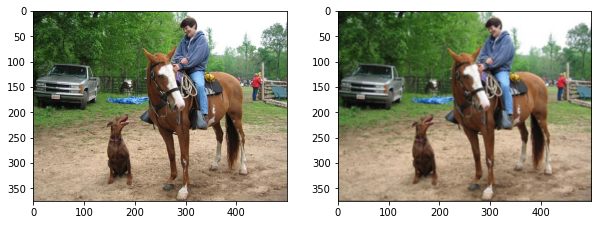

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("data/02.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def mean_filter(img, K_Size = 3):
    H, W, C = img.shape

    ## Zero padding
    pad = K_Size // 2
    out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
    out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)

    tmp = out.copy()

    # filtering
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[pad+y, pad+x, c] = np.mean(tmp[y:y+K_Size, x:x+K_Size, c])

    out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

    return out

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1) 
plt.imshow(img)

out_filter = mean_filter(img)
plt.subplot(1, 2, 2)
plt.imshow(out_filter)

# 5.Motion滤波

Motion Filter取对角线方向的像素的平均值，卷积核为$\begin{bmatrix}
\frac{1}{3}&0&0 \\
0&\frac{1}{3}&0 \\
0&0&\frac{1}{3}
\end{bmatrix}$

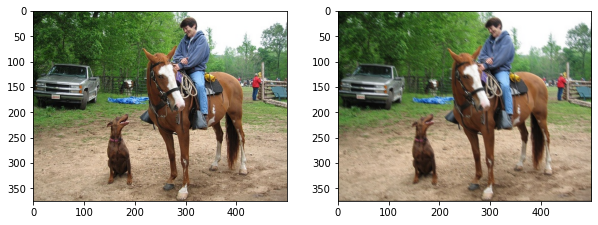

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("data//02.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def motion_filter(img, K_Size = 3):
    H, W, C = img.shape
    
    K = np.diag([1] * K_Size).astype(np.float)
    K /= K_Size
    
    ## Zero padding
    pad = K_Size // 2
    out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
    out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)

    tmp = out.copy()

    # filtering
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[pad+y, pad+x, c] = np.sum(K * tmp[y:y+K_Size, x:x+K_Size, c])

    out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

    return out

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1) 
plt.imshow(img)

out_filter = motion_filter(img)
plt.subplot(1, 2, 2)
plt.imshow(out_filter)

# 6.MAX-MIN滤波器

MAX-MIN滤波器使用网格内像素的最大值和最小值的差值对网格内像素重新赋值。

通常用于边缘检测。边缘检测用于检测图像中的线。像这样提取图像中的信息的操作被称为特征提取。边缘检测通常在灰度图像上进行

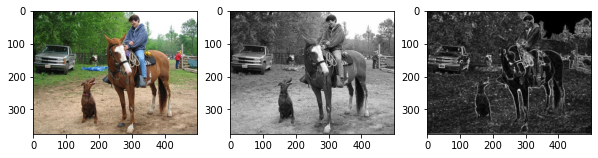

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("data/02.jpg")

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
out = 0.2126 * r + 0.7152 * g + 0.0722 * b
out = out.astype(np.uint8)

def max_min_filter(img, K_size=3):
	H, W = img.shape

	## Zero padding
	pad = K_size // 2
	out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
	out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)
	tmp = out.copy()

	# filtering
	for y in range(H):
		for x in range(W):
			out[pad + y, pad + x] = np.max(tmp[y: y + K_size, x: x + K_size]) - np.min(tmp[y: y + K_size, x: x + K_size])

	out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

	return out

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 3, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img1)

plt.subplot(1, 3, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)

plt.subplot(1, 3, 3)
out = max_min_filter(out)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)